Using TensorFlow backend.


11051008/11490434 [===========================>..] - ETA: 0s(50000, 28, 28) (50000,)


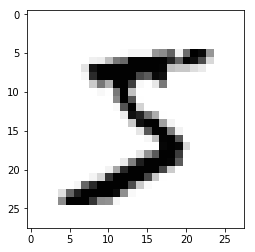

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [11]:
import numpy as np

In [3]:
X_test, X_train = X_test.reshape([X_test.shape[0], 784]), X_train.reshape([X_train.shape[0], 784])

In [4]:
import tensorflow as tf

In [5]:
X = tf.placeholder(tf.float32, shape=(None, 784))
y = tf.placeholder(tf.float32, shape=(None, 10))

In [6]:
w1 = tf.get_variable('w1', shape=[784, 128], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable('b1', shape=[128], initializer=tf.zeros_initializer())
w2 = tf.get_variable('w2', shape=[128, 128], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable('b2', shape=[128], initializer=tf.zeros_initializer())
w3 = tf.get_variable('w3', shape=[128, 10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable('b3', shape=[10], initializer=tf.zeros_initializer())

In [7]:
prob = tf.placeholder(tf.float32)

In [8]:
k1 = tf.matmul(X, w1)+b1
m1 = tf.nn.relu(k1)
m1 = tf.nn.dropout(m1, prob)
k2 = tf.matmul(m1, w2)+b2
m2 = tf.nn.relu(k2)
m2 = tf.nn.dropout(m2, prob)
k3 = tf.matmul(m2, w3)+b3
m3 = tf.nn.sigmoid(k3)

In [10]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=m3))
start_lr = 0.0005
step = tf.Variable(0, trainable=False)
lr = tf.train.exponential_decay(start_lr, step, 100, 0.01, staircase=True)
optimizer = tf.train.AdamOptimizer(lr).minimize(loss)

In [13]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [16]:
init = tf.global_variables_initializer()

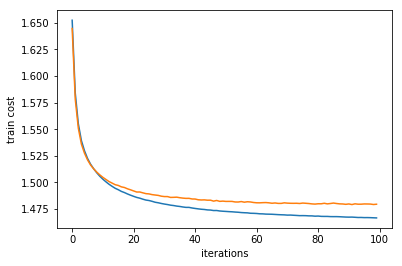

Train Accuracy: 0.99404
Test Accuracy: 0.9789


In [20]:
batch_size = 500
with tf.Session() as sess:
    sess.run(init)
    train_loss = []
    test_loss = []
    for epoch in range(100):
        for i in range(0, 50000, batch_size):
            sess.run(optimizer, feed_dict={X:X_train[i:i+batch_size], y:y_train[i: i+batch_size], prob : 0.65})
        train_loss.append(sess.run(loss, feed_dict={X:X_train, y:y_train, prob : 1}))
        test_loss.append(sess.run(loss, feed_dict={X:X_test, y:y_test, prob : 1}))
        
    iter = list(np.arange(100))
    plt.plot(iter, train_loss, label='Train')
    plt.plot(iter, test_loss, label='Test')
    plt.ylabel('train cost')
    plt.xlabel('iterations')
    plt.show()
    
    # Correct predictions
    predict_op = tf.argmax(k3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(y, 1))

    # Accuracy on test data
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    train_accuracy = accuracy.eval({X: X_train, y: y_train, prob : 1})
    test_accuracy = accuracy.eval({X: X_test, y: y_test, prob : 1})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)